# Correlation between Head Sizes and Sex
Working on analyzing the correlation between head size and sex given prediction results from a CNN

## Import Libraries
Libraries necessary to run code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import csv
from scipy import stats

## Functions to Import Subject IDs
From 'subject_ids' folder

In [2]:
def get_ids(fold_num):
    file_name = "subject_ids/subid_" + str(fold_num) + ".txt" 
    subject_ids_file = open(file_name, mode='r')
    lines = subject_ids_file.readlines()
    subject_ids_file.close()
    subject_ids = []
    for line in lines:
        subject_ids.append(line[:-1])
    return subject_ids

## Functions to Import Predictions
Both flipped ('prediction_flip') and unflipped ('prediction') predictions

In [3]:
def get_predictions(fold_num, flip):
    file_name = ""
    if (flip):
        file_name = "prediction_flip/prediction_flip_" + str(fold_num) + ".txt" 
    else:
        file_name = "predictions/prediction_" + str(fold_num) + ".txt" 
    prediction_file = open(file_name, mode='r')
    lines = prediction_file.readlines()
    prediction_file.close()
    predictions = []
    for line in lines:
        predictions.append(float(line))
    return predictions

## Getting Head Sizes
Get head sizes from corresponding subject IDs

In [4]:
def get_head_sizes(subject_ids):
    head_sizes = [None] * len(subject_ids)
    with open('svol.csv') as head_size_file:
        csv_reader = csv.reader(head_size_file, delimiter=',')
        num_lines = 0
        for row in csv_reader:
            if num_lines == 0:
                num_lines += 1
            else:
                for subject in subject_ids:
                    if (subject == row[0]):
                        cor_index = subject_ids.index(row[0])
                        head_sizes[cor_index] = row[1]
                num_lines += 1
    return head_sizes

## Get Sexes
Use the general .csv file to get all sexes

In [5]:
def get_sexes(subject_ids):
    sexes = [None] * len(subject_ids)
    with open('abcd_ssphp01.csv') as all_info_file:
        csv_reader = csv.reader(all_info_file, delimiter=',')
        num_lines = 0
        for row in csv_reader:
            if num_lines <= 1:
                num_lines += 1
            else:
                for subject in subject_ids:
                    if (subject == row[4]):
                        cor_index = subject_ids.index(row[4])
                        sexes[cor_index] = row[7]
                num_lines += 1
        return sexes

## Plot Fold Graphs
Plot correlation with each fold, not differentiated by sex

In [6]:
def plot_fold_graphs(head_sizes, predictions,predictions_flip, i):
    # Get a random sample of data to show
    start = random.randint(0, len(predictions) - 101)
    # Calculate average of unflipped and flipped predictions
    head_np = np.array(head_sizes).astype(np.float)
    predict_np = np.array(predictions).astype(np.float)
    predict_flip_np = np.array(predictions_flip).astype(np.float)
    predictions_np = (predict_np + predict_flip_np) / 2
    # Plotting
    plt.figure()
    plt.scatter(head_np[start:start+100], predictions_np[start:start+100])
    # Formatting
    plt.title("Head Size vs. Prediction Score - Fold " + str(i))
    plt.xlabel("Head Size")
    plt.ylabel("Prediction Score")
    plt.ylim(0, 1)
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    # Saving
    plt.savefig("fold_graphs/fold_" + str(i) + ".png")
    return head_np, predictions_np

## Get Arrays based on Sex
Getting respective arrays based on sex

In [7]:
def get_sex_arrays(subject_ids, sexes, predictions, predictions_flip, head_sizes):
    male_predictions = []
    male_prediction_flip = []
    male_head_sizes = []
    female_predictions = []
    female_prediction_flip = []
    female_head_sizes = []
    for i in range(0, len(subject_ids)):
        if (sexes[i] == "M"):
            male_predictions.append(predictions[i])
            male_prediction_flip.append(predictions_flip[i])
            male_head_sizes.append(head_sizes[i])
        else:
            female_predictions.append(predictions[i])
            female_prediction_flip.append(predictions_flip[i])
            female_head_sizes.append(head_sizes[i])
    return male_predictions, male_prediction_flip, male_head_sizes, female_predictions, female_prediction_flip, female_head_sizes

## Plotting Graphs Based on Sex
Graphs + correlation based on sex

In [8]:
def plot_sex_graphs(head_sizes, predictions,predictions_flip, i, sex):
    # Get a random sample of data to show
    start = random.randint(0, len(predictions) - 101)
    # Calculate average of unflipped and flipped predictions
    head_np = np.array(head_sizes).astype(np.float)
    predict_np = np.array(predictions).astype(np.float)
    predict_flip_np = np.array(predictions_flip).astype(np.float)
    predictions_np = (predict_np + predict_flip_np) / 2
    # Plotting
    plt.figure()
    plt.scatter(head_np[start:start+100], predictions_np[start:start+100])
    # Formatting
    plt.title("Head Size vs. Sex - Fold " + str(i) + ", " + sex)
    plt.xlabel("Head Size")
    plt.ylabel("Prediction Score")
    plt.ylim(0, 1)
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    # Saving
    plt.savefig("fold_sexes/fold_" + str(i) + "_" + sex + ".png")
    return head_np, predictions_np

## Calculate Correlation and P-Value
Use scipy.stats to calculate Pearson Correlation and P-Value

In [9]:
def calculate_correlation(head_np, predictions_np, i, type):
    correlation_matrix = stats.pearsonr(head_np, predictions_np)
    correlation_file = open("fold_correlations/correlation_" + str(i) + ".txt", "a+")
    correlation_file.write("Correlation of " + type + " fold " + str(i) + ": " + str(correlation_matrix[0]) + "\n")
    correlation_file.write("P-Value of " + type + " fold " + str(i) + ": " + str(correlation_matrix[1]) + "\n")
    correlation_file.close()

## Main Function
Loops through all folds, gets ids and predictions, plots them, and finds correlation

<ipython-input-8-97240bd0dcf7>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  head_np = np.array(head_sizes).astype(np.float)
<ipython-input-8-97240bd0dcf7>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predict_np = np.array(predictions).astype(np.float)
<ipython-input-8-97240bd0dcf7>:7: DeprecationWarning: `np.float` is a deprecated

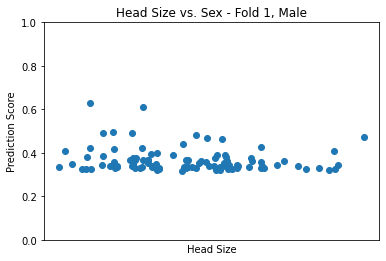

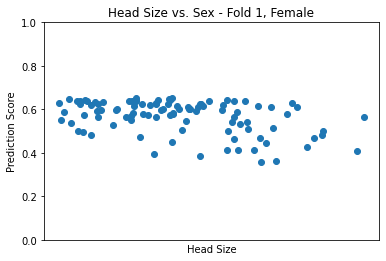

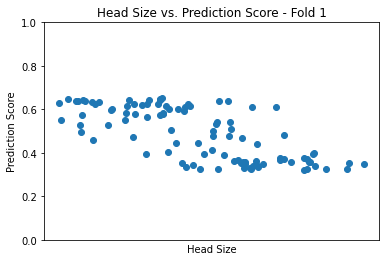

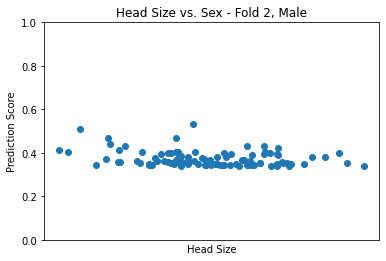

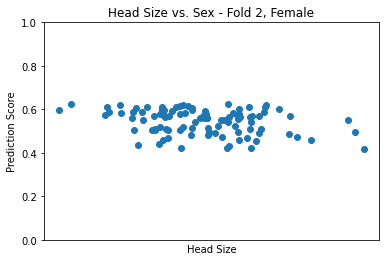

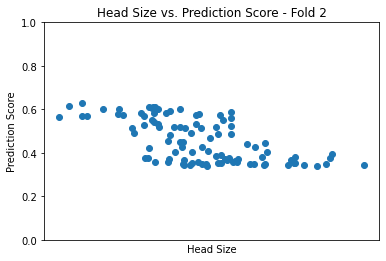

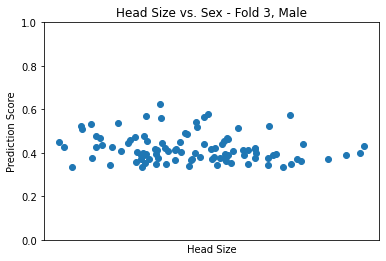

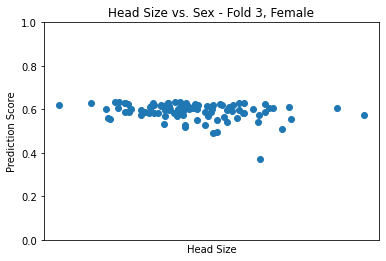

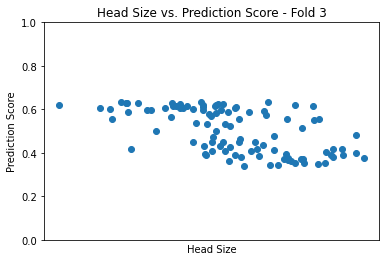

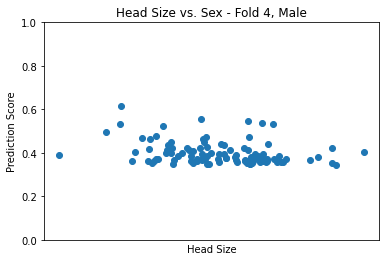

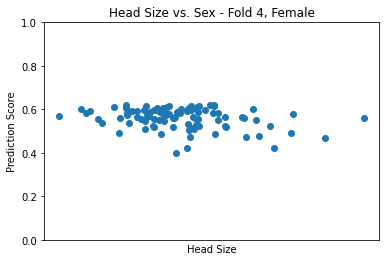

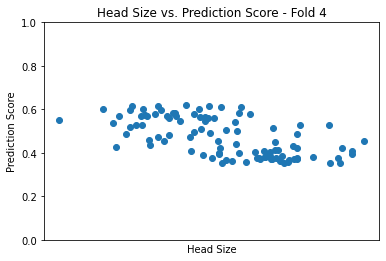

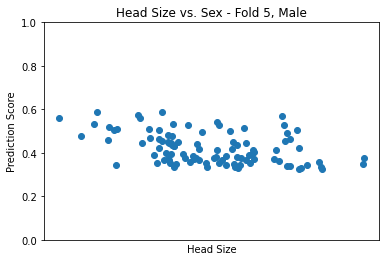

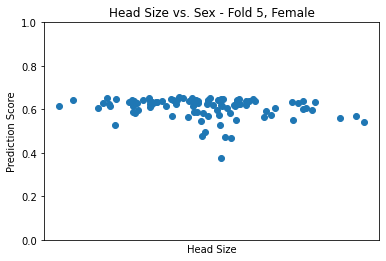

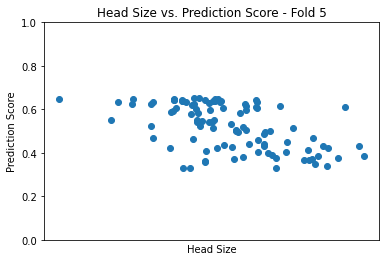

In [10]:
def run_correlation_reports():
    for i in range(1, 6):
        subject_ids = get_ids(i)
        predictions = get_predictions(i, False)
        predictions_flip = get_predictions(i, True)
        if (len(predictions) != len(subject_ids) or len(predictions_flip) != len(subject_ids)):
            print("ERROR: Not equal amounts of IDs and predictions.")
        head_sizes = get_head_sizes(subject_ids)
        sexes = get_sexes(subject_ids)
        male_predictions, male_prediction_flip, male_head_sizes, female_predictions, female_prediction_flip, female_head_sizes = get_sex_arrays(subject_ids, sexes, predictions, predictions_flip, head_sizes)
        male_head_np, male_predictions_np = plot_sex_graphs(male_head_sizes, male_predictions, male_prediction_flip, i, "Male")
        female_head_np, female_predictions_np = plot_sex_graphs(female_head_sizes, female_predictions, female_prediction_flip, i, "Female")
        head_np, predictions_np = plot_fold_graphs(head_sizes, predictions, predictions_flip, i)
        calculate_correlation(head_np, predictions_np, i, "total")
        calculate_correlation(male_head_np, male_predictions_np, i, "male")
        calculate_correlation(female_head_np, female_predictions_np, i, "female")

run_correlation_reports()